In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df = df.rename(columns={'race/ethnicity':'ethnicity_group', 
                   'parental level of education':'parents_education', 
                   'test preparation course':'preparation_course',
                   'math score':'math_score',
                   'reading score':'reading_score',
                   'writing score':'writing_score'
                  })

In [8]:
df.head()

,gender,ethnicity_group,parents_education,lunch,preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
fail = 40

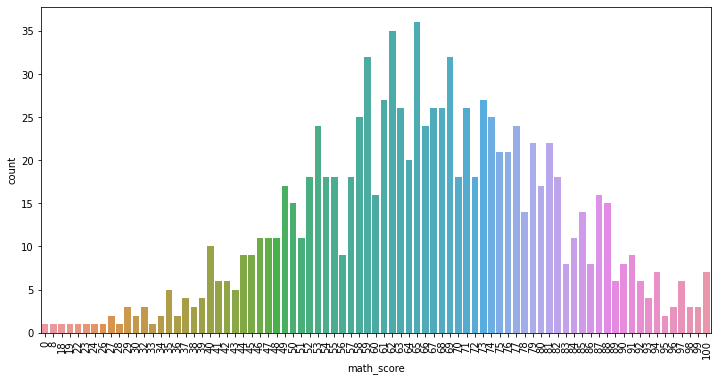

In [10]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="math_score", data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

In [11]:
df['math_status'] = np.where(df.math_score < fail, 'F', 'P')
df.math_status.value_counts()

P    960
F     40
Name: math_status, dtype: int64

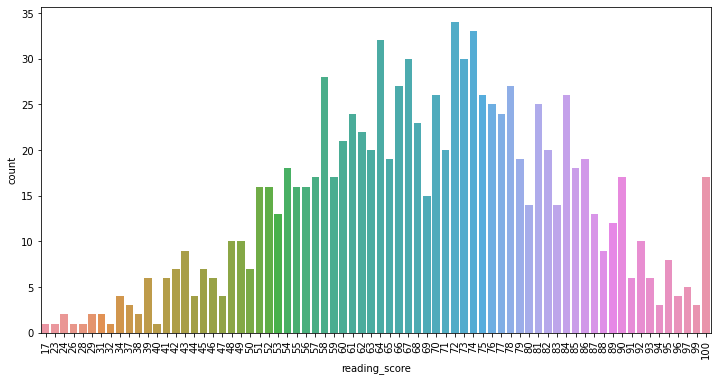

In [12]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="reading_score", data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

In [13]:
df['reading_status'] = np.where(df.reading_score < fail, 'F', 'P')
df.reading_status.value_counts()

P    974
F     26
Name: reading_status, dtype: int64

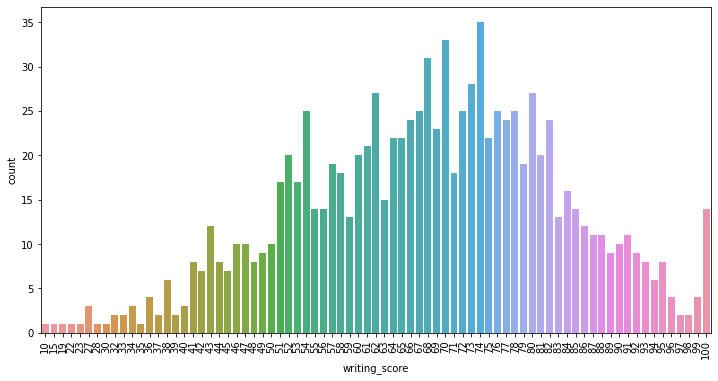

In [14]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="writing_score", data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

In [15]:
df['writing_status'] = np.where(df.writing_score < fail, 'F', 'P')
df.writing_status.value_counts()

P    968
F     32
Name: writing_status, dtype: int64

In [16]:
df['overall_status'] = df.apply(lambda x: 'F' if x['math_status'] == 'F' or x['reading_status'] == 'F' 
                                or x['writing_status'] == 'F' else 'P', axis=1)
df.overall_status.value_counts()

P    949
F     51
Name: overall_status, dtype: int64

In [17]:
df.head()

,gender,ethnicity_group,parents_education,lunch,preparation_course,math_score,reading_score,writing_score,math_status,reading_status,writing_status,overall_status
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P
4,male,group C,some college,standard,none,76,78,75,P,P,P,P


In [18]:
df['total_score'] = df.math_score + df.writing_score + df.reading_score

In [19]:
df['average_score'] = round(df.total_score / 3 ,0)

In [20]:
df.head()

,gender,ethnicity_group,parents_education,lunch,preparation_course,math_score,reading_score,writing_score,math_status,reading_status,writing_status,overall_status,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,73.0
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.0
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.0


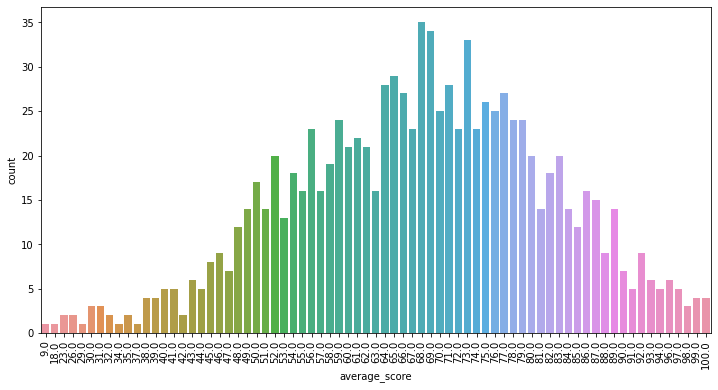

In [21]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="average_score", data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);

In [22]:
def getgrade(average_score, overall_status):
    if (overall_status == 'F'):
        return 'F'
    if (average_score >= 80):
        return 'A'
    if (average_score >= 70):
        return 'B'
    if (average_score >= 60):
        return 'C'
    if (average_score >= 50):
        return 'D'
    if (average_score >= 40):
        return 'E'
    else:
        return 'F'

In [23]:
df['grade'] = df.apply(lambda x: getgrade(x['average_score'], x['overall_status']), axis=1)
df.grade.value_counts()

B    258
C    256
A    206
D    176
E     53
F     51
Name: grade, dtype: int64

In [24]:
df.head()

,gender,ethnicity_group,parents_education,lunch,preparation_course,math_score,reading_score,writing_score,math_status,reading_status,writing_status,overall_status,total_score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,73.0,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.0,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,93.0,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.0,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.0,B


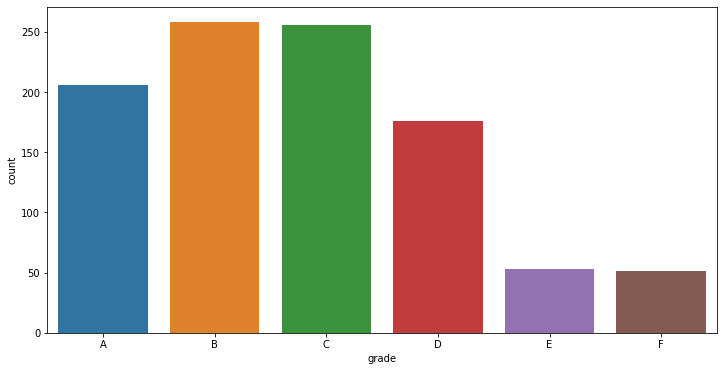

In [25]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="grade", data = df, order=['A','B','C','D','E','F'])

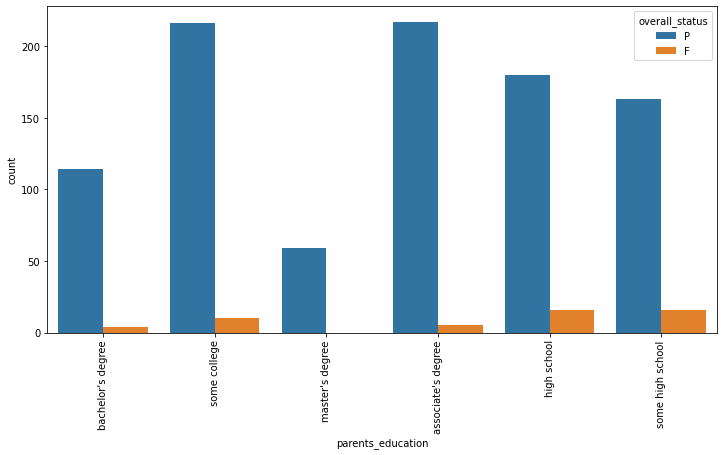

In [26]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='parents_education', data = df, hue='overall_status')
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);

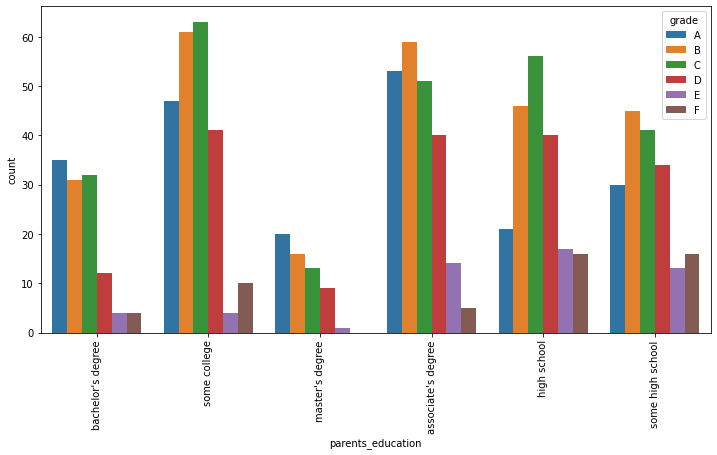

In [27]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='parents_education', data = df, hue='grade', hue_order=['A','B','C','D','E','F'])
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);

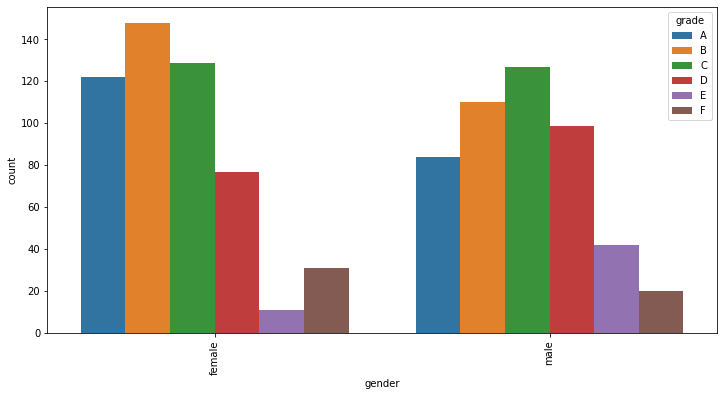

In [28]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='gender', data = df, hue='grade', hue_order=['A','B','C','D','E','F'])
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);

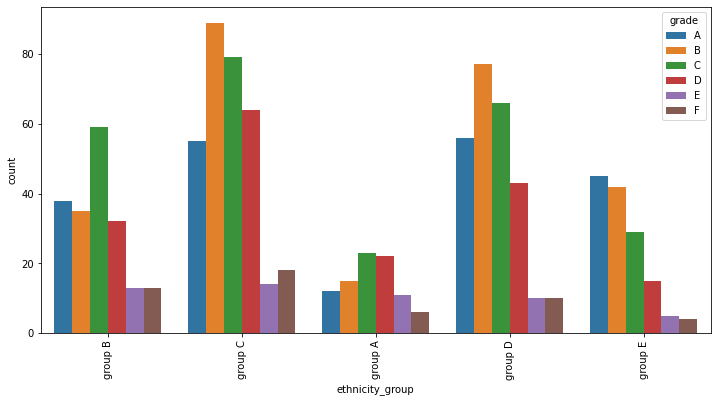

In [29]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='ethnicity_group', data = df, hue='grade', hue_order=['A','B','C','D','E','F'])
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);

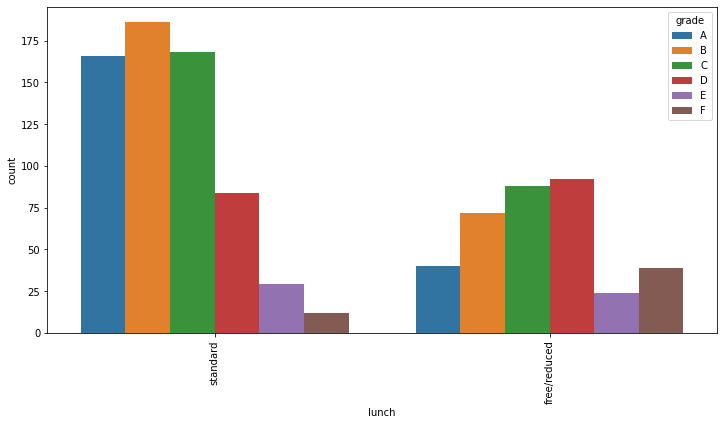

In [30]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='lunch', data = df, hue='grade', hue_order=['A','B','C','D','E','F'])
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);

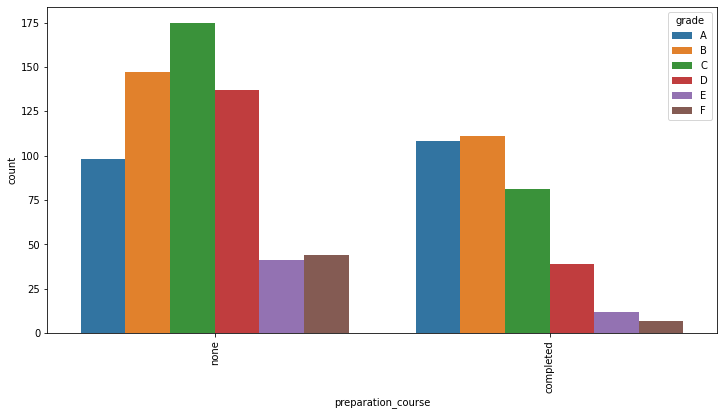

In [31]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='preparation_course', data = df, hue='grade', hue_order=['A','B','C','D','E','F'])
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

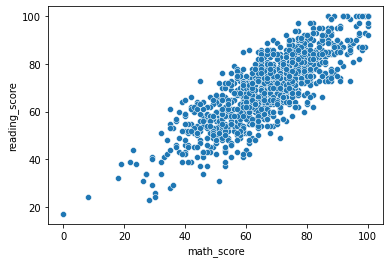

In [32]:
sns.scatterplot(x='math_score', y='reading_score', data = df )
# sns.scatterplot(x='math_score', y='writing_score', data = df )

In [33]:
df[['math_score','reading_score']].corr()

,math_score,reading_score
math_score,1.00000,0.81758
reading_score,0.81758,1.00000


In [34]:
df[['math_score','reading_score','writing_score']].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linear_regressor = LinearRegression()
linear_regressor.fit(df[['math_score']],df[['reading_score']])
linear_regressor.coef_

array([[0.78722924]])

In [37]:
# reading score = 0.78722924 * math score + C

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

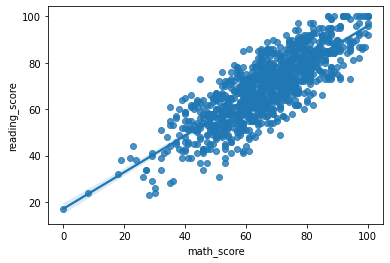

In [38]:
sns.regplot(x='math_score', y='reading_score', data = df)

In [39]:
linear_regressor = LinearRegression()
linear_regressor.fit(df[['math_score']],df[['writing_score']])
linear_regressor.coef_

array([[0.80436647]])

<AxesSubplot:xlabel='math_score', ylabel='writing_score'>

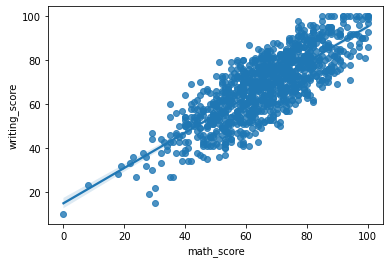

In [40]:
sns.regplot(x='math_score', y='writing_score', data = df)

In [41]:
linear_regressor = LinearRegression()
linear_regressor.fit(df[['reading_score']],df[['writing_score']])
linear_regressor.coef_

array([[0.99353111]])

<AxesSubplot:xlabel='reading_score', ylabel='writing_score'>

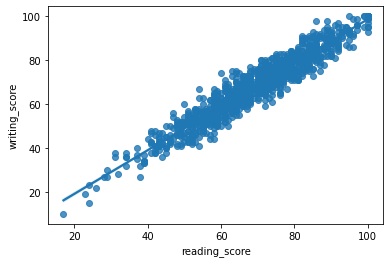

In [42]:
sns.regplot(x='reading_score', y='writing_score', data = df)

In [43]:
df.head()

,gender,ethnicity_group,parents_education,lunch,preparation_course,math_score,reading_score,writing_score,math_status,reading_status,writing_status,overall_status,total_score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,73.0,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.0,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,93.0,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.0,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.0,B


In [44]:
df.groupby(['gender','lunch']) \
    .agg({'lunch':'count'})

lunch
gender lunch              
female free/reduced    189
       standard        329
male   free/reduced    166
       standard        316

In [45]:
df.groupby(['gender','preparation_course']) \
    .agg({'preparation_course':'count'})

preparation_course
gender preparation_course                    
female completed                          184
       none                               334
male   completed                          174
       none                               308

<AxesSubplot:xlabel='gender', ylabel='total_score'>

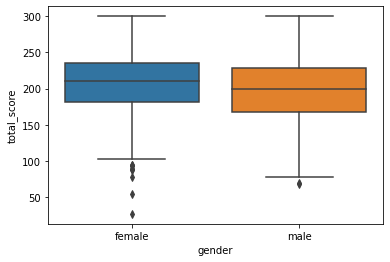

In [46]:
sns.boxplot(x="gender", y="total_score", data=df)

C:\Users\aliso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_score'>

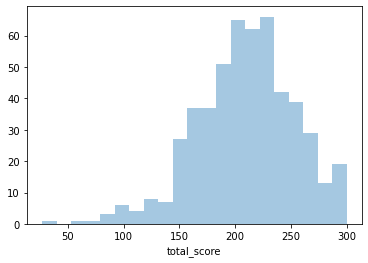

In [47]:
sns.distplot(df[df.gender == 'female'].total_score, kde=False)

<AxesSubplot:xlabel='total_score'>

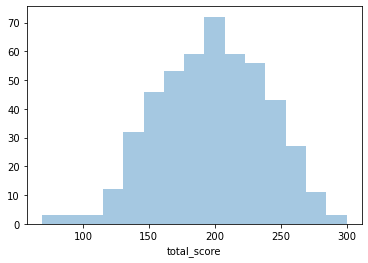

In [48]:
sns.distplot(df[df.gender == 'male'].total_score, kde=False)

In [49]:
mannwhitneyu(df[df.gender == 'male'].total_score, 
             df[df.gender == 'female'].total_score)

MannwhitneyuResult(statistic=104910.0, pvalue=1.261451200049347e-05)

In [50]:
ttest_ind(df[df.gender == 'male'].total_score, 
             df[df.gender == 'female'].total_score)

Ttest_indResult(statistic=-4.169913529142, pvalue=3.311973638243664e-05)

In [51]:
ttest_ind(df[df.parents_education == "bachelor's degree"].total_score, 
             df[df.parents_education == 'high school'].total_score)

Ttest_indResult(statistic=5.539323736236869, pvalue=6.457780161976959e-08)

In [52]:
df.head()

,gender,ethnicity_group,parents_education,lunch,preparation_course,math_score,reading_score,writing_score,math_status,reading_status,writing_status,overall_status,total_score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,73.0,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.0,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,93.0,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.0,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.0,B
